# Analyzing Joe Biden's and Donald Trump's tweets during the coronavirus pandemic.

# Table of Contents

* [1. Importing Packages](#importing_packages)
* [2. Loading the Data](#load_data)
* [3. Data Cleaning and Preparation](#data_clean)
* [4. Exploring the Data: Aggregate and Frequency statistics](#explore_data)
* [5. Sentiment Analysis](#sentiment_analysis)
* [6. Topic Modeling](#topic_modeling)
* [7. Classification](#classification)

# 1. Importing packages <a class="anchor" id="importing_packages">

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import everygrams
from nltk import ngrams
from nltk import FreqDist
from nltk.tokenize.treebank import TreebankWordDetokenizer
from textblob import TextBlob
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm, metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. Load Data<a class="anchor" id="load_data">

In [2]:
trump_df = pd.read_csv("trump.csv")
biden_df = pd.read_csv("biden.csv")

In [3]:
trump_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,I am deeply saddened by the loss of my friend ...,07-22-2020 22:46:27,24836,126563,False,1286070129965649922
1,We MUST protect our National Parks for our chi...,07-22-2020 19:32:42,31289,155074,False,1286021372070830084
2,Mail-In Voting unless changed by the courts wi...,07-21-2020 11:41:10,45537,172449,False,1285540318503407622
3,Strong Stock Market Numbers. You want to see t...,07-21-2020 11:33:05,30439,147781,False,1285538283892748288
4,“In my view General Flynn should never have be...,07-21-2020 10:48:12,21231,90140,False,1285526989667958784
...,...,...,...,...,...,...
5181,I will be signing our very large and comprehen...,12-31-2019 14:16:40,22730,95208,False,1212014713808273410
5182,President Putin of Russia called to thank me a...,12-31-2019 14:06:09,29025,141918,False,1212012065440894976
5183,Armed congregants quickly stopped a crazed chu...,12-31-2019 13:53:10,25719,114701,False,1212008798849814528
5184,Iran killed an American contractor wounding ma...,12-31-2019 12:02:47,37287,150318,False,1211981022084128768


In [4]:
biden_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Donald Trump’s own staff admits that he fails ...,2020-07-24 00:30:00,4867,19073,False,1286458575150370817
1,We need a president who listens to someone oth...,2020-07-23 23:15:00,15827,110536,False,1286439700958453763
2,This was preventable. https://t.co/NWaHXW8U4K,2020-07-23 22:10:00,12336,56418,False,1286423343135182848
3,"Out of every trial and tribulation, we've alwa...",2020-07-23 21:40:00,4158,12282,False,1286415793245347845
4,"Hey @Phillies, here’s to hoping we both win bi...",2020-07-23 20:05:00,4914,35253,False,1286391885993373696
...,...,...,...,...,...,...
3087,President Trump’s ICE raids are inhumane. His ...,2019-07-13 20:55:00,3886,19173,False,1150146631569989633
3088,I’m heartbroken to hear of the passing of Héct...,2019-07-13 19:55:00,200,1299,False,1150131532092383232
3089,Had the opportunity to spend some time with th...,2019-07-13 19:19:12,167,885,False,1150122523075457025
3090,"As individuals, and as a nation, we have to pr...",2019-07-13 17:13:00,520,2076,False,1150090763214004224


# 3. Data Cleaning and Preparation<a class="anchor" id="data_clean">

### Functions for text cleaning

In [5]:
global stop_words
stop_words = stopwords.words('english')
custom_stopwords = ['amp', 'youre', 'dont','wont', 'got']
stop_words.extend(custom_stopwords)

def detect_language(X):
    from langdetect import detect
    try:
        lang = detect(X)
        return(lang)
    except:
        return("other")
    
def remove_url_punctuation(X):
    """ Replace URLS, punctuations, hashtags found in a text string with nothing.
    Change to lowercase"""
    # Try with just simple /w+ regex.       
    url_pattern = re.compile(r'https:?://\S+|www\.\S+')
    replace_url = url_pattern.sub(r'', str(X))
    punct_pattern = re.compile(r'[^\w\s]')
    no_punct = punct_pattern.sub(r'', replace_url).lower()
    no_punct = no_punct.replace('\n', ' ')
    no_punct = no_punct.replace('\t', ' ')
    return no_punct

def split_words(X):
    """"" Split tweets into words for NLP"""
    split_word_list = X.split(" ")
    return split_word_list

def remove_stopwords(X):
    filtered_words = []
    global stop_words
    for word in X:
        if word not in stop_words and len(word) > 2 and word != 'nan':
            filtered_words.append(word)
    return filtered_words

# All the above in one function
def basic_processing(text):
    clean_text = remove_url_punctuation(text)
    tokens = split_words(clean_text)
    tokens = remove_stopwords(tokens) 
    return tokens

### Get Biden tweets since the emergence of [COVID19](https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200121-sitrep-1-2019-ncov.pdf). Trump dataset already filtered by start date. 

In [6]:
START_DATE = pd.to_datetime('31-12-2019')
biden_df['created_at'] = pd.to_datetime(biden_df['created_at'])
trump_df['created_at'] = pd.to_datetime(trump_df['created_at'])
biden_df = biden_df.loc[biden_df['created_at'] >= START_DATE]
biden_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Donald Trump’s own staff admits that he fails ...,2020-07-24 00:30:00,4867,19073,False,1286458575150370817
1,We need a president who listens to someone oth...,2020-07-23 23:15:00,15827,110536,False,1286439700958453763
2,This was preventable. https://t.co/NWaHXW8U4K,2020-07-23 22:10:00,12336,56418,False,1286423343135182848
3,"Out of every trial and tribulation, we've alwa...",2020-07-23 21:40:00,4158,12282,False,1286415793245347845
4,"Hey @Phillies, here’s to hoping we both win bi...",2020-07-23 20:05:00,4914,35253,False,1286391885993373696
...,...,...,...,...,...,...
1706,"As we move into the New Year, there's one thin...",2019-12-31 23:30:00,7949,66898,False,1212153964206198789
1707,2019 was a year of record violence — it will b...,2019-12-31 22:02:37,986,3552,False,1212131972295929856
1708,Next year could give us one of two things: a n...,2019-12-31 20:45:00,470,1779,False,1212112439623458826
1709,It will take years to repair the damage Betsy ...,2019-12-31 17:15:00,6375,24950,False,1212059591569297408


### Retain English tweets

In [7]:
trump_df['en'] = trump_df['text'].apply(detect_language)
biden_df['en'] = biden_df['text'].apply(detect_language)

trump_df = trump_df[trump_df['en'] == 'en']
biden_df = biden_df[biden_df['en'] == 'en']

### Remove punctuation, special characters, and hashtags in tweets

In [8]:
trump_df['clean_text'] = trump_df['text'].apply(remove_url_punctuation)
biden_df['clean_text'] = biden_df['text'].apply(remove_url_punctuation)
print(trump_df['text'].head())
print('-------------------------------------')
print(trump_df['clean_text'].head())

0    I am deeply saddened by the loss of my friend ...
1    We MUST protect our National Parks for our chi...
2    Mail-In Voting unless changed by the courts wi...
3    Strong Stock Market Numbers. You want to see t...
4    “In my view General Flynn should never have be...
Name: text, dtype: object
-------------------------------------
0    i am deeply saddened by the loss of my friend ...
1    we must protect our national parks for our chi...
2    mailin voting unless changed by the courts wil...
3    strong stock market numbers you want to see th...
4    in my view general flynn should never have bee...
Name: clean_text, dtype: object


### Tokenize Tweets

In [9]:
trump_df['tokens'] = trump_df['clean_text'].apply(split_words)
biden_df['tokens'] = biden_df['clean_text'].apply(split_words)
print(trump_df['clean_text'].head())
print('-------------------------------------')
print(trump_df['tokens'].head())

0    i am deeply saddened by the loss of my friend ...
1    we must protect our national parks for our chi...
2    mailin voting unless changed by the courts wil...
3    strong stock market numbers you want to see th...
4    in my view general flynn should never have bee...
Name: clean_text, dtype: object
-------------------------------------
0    [i, am, deeply, saddened, by, the, loss, of, m...
1    [we, must, protect, our, national, parks, for,...
2    [mailin, voting, unless, changed, by, the, cou...
3    [strong, stock, market, numbers, you, want, to...
4    [in, my, view, general, flynn, should, never, ...
Name: tokens, dtype: object


### Remove Stop Words with NLTK

In [10]:
trump_df['tokens'] = trump_df['tokens'].apply(remove_stopwords)
biden_df['tokens'] = biden_df['tokens'].apply(remove_stopwords)
print(trump_df['tokens'].head())

0    [deeply, saddened, loss, friend, charles, ever...
1    [must, protect, national, parks, children, gra...
2    [mailin, voting, unless, changed, courts, lead...
3    [strong, stock, market, numbers, want, see, di...
4    [view, general, flynn, never, prosecuted, firs...
Name: tokens, dtype: object


# 4. Exploring the Data: Aggregate and Frequency Statistics<a class="anchor" id="explore_data">

In [11]:
trump_df.describe()

,retweet_count,favorite_count,id_str
count,4615.000000,4615.000000,4.615000e+03
mean,17955.441170,57645.367714,1.243055e+18
std,15411.695913,80936.116430,1.897700e+16
min,0.000000,0.000000,1.211969e+18
25%,7740.500000,0.000000,1.226120e+18
50%,13357.000000,28526.000000,1.241662e+18
75%,23630.500000,93904.500000,1.257781e+18
max,225693.000000,830795.000000,1.286070e+18


In [12]:
biden_df.describe()

,retweet_count,favorite_count,id_str
count,1676.000000,1.676000e+03,1.676000e+03
mean,8384.615155,4.069876e+04,1.248493e+18
std,12698.710369,6.848496e+04,2.030649e+16
min,11.000000,3.400000e+01,1.211809e+18
25%,1913.000000,7.488750e+03,1.232108e+18
50%,4777.500000,1.982500e+04,1.247396e+18
75%,10714.500000,4.830775e+04,1.265036e+18
max,333504.000000,1.662229e+06,1.286459e+18


## How engaging are their tweets?: Viewing the average number of retweets and favorites. 

#### Trump

In [13]:
trump_rt_avg = trump_df.mean()['retweet_count']
print("Trump retweet average:", trump_rt_avg)

Trump retweet average: 17955.441170097507


In [14]:
trump_favorite_avg = trump_df.mean()['favorite_count']
print("Trump favorite average:", trump_favorite_avg)

Trump favorite average: 57645.367713976164


In [15]:
trump_most_rts = trump_df.loc[trump_df['retweet_count'].idxmax()].text
print("Trump's most retweeted and favorited tweet:", trump_most_rts)

Trump's most retweeted and favorited tweet: The United States of America will be designating ANTIFA as a Terrorist Organization.


#### Biden

In [16]:
biden_rt_avg = biden_df.mean()['retweet_count']
print("Biden retweet average:", biden_rt_avg)

Biden retweet average: 8384.615155131265


In [17]:
biden_favorite_avg = biden_df.mean()['favorite_count']
print("Biden favorite average:", biden_favorite_avg)

Biden favorite average: 40698.75715990453


In [18]:
biden_most_rts = biden_df.loc[biden_df['retweet_count'].idxmax()].text
print("Biden's most retweeted and favorited tweet:", biden_most_rts)

Biden's most retweeted and favorited tweet: I can’t believe I have to say this, but please don’t drink bleach.


In [19]:
# Calculate how much more retweets and favorites trump gets on average than Biden
print("Trump gets", round(trump_rt_avg / biden_rt_avg, 2), "times more retweets than Biden." )
print("That's an increase of", round(100 * (trump_rt_avg - biden_rt_avg) / biden_rt_avg, 2) ,"%")

Trump gets 2.14 times more retweets than Biden.
That's an increase of 114.15 %


In [20]:
print("Trump gets", round(trump_favorite_avg / biden_favorite_avg, 2), "times more favorites than Biden." )
print("That's an increase of", round(100 * (trump_favorite_avg - biden_favorite_avg) / biden_favorite_avg, 2) ,"%")

Trump gets 1.42 times more favorites than Biden.
That's an increase of 41.64 %


## Looks like Trump gets much more retweets and favorites than Biden. Let's use boxplots to visualize the differences more clearly. 

C:\Users\david\anaconda3\envs\PythonCPU\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Trump vs Biden Retweets')

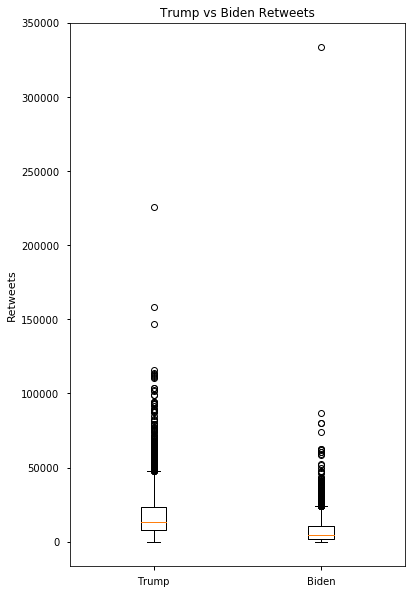

In [21]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(6, 10))
plt.boxplot([trump_df['retweet_count'], biden_df['retweet_count']], labels=['Trump', 'Biden'], autorange=False)

plt.ylabel('Retweets')
plt.title('Trump vs Biden Retweets')

C:\Users\david\anaconda3\envs\PythonCPU\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Trump vs Biden Favorites')

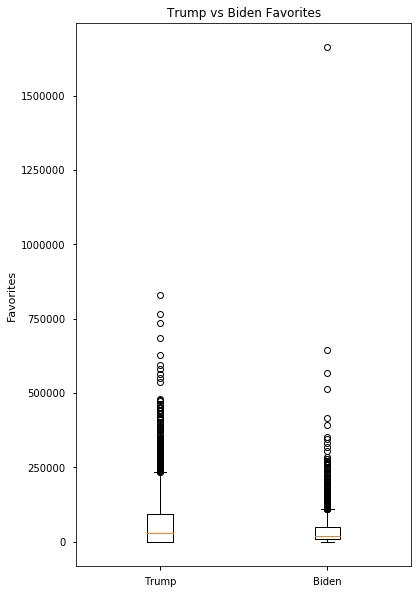

In [22]:
plt.figure(figsize=(6, 10))
plt.boxplot([trump_df['favorite_count'], biden_df['favorite_count']], labels=['Trump', 'Biden'], autorange=False)
plt.ylabel('Favorites')
plt.title('Trump vs Biden Favorites')

## Which words and n-grams do they use the most?

### Unigrams

In [23]:
trump_tokens = trump_df['tokens'].explode()
biden_tokens = biden_df['tokens'].explode()

trump_unigrams = FreqDist(ngrams(trump_tokens, 1))
biden_unigrams = FreqDist(ngrams(biden_tokens, 1))

[(('great',), 700),
 (('realdonaldtrump',), 526),
 (('president',), 499),
 (('people',), 408),
 (('thank',), 340),
 (('trump',), 335),
 (('democrats',), 310),
 (('news',), 309),
 (('new',), 271),
 (('coronavirus',), 255),
 (('fake',), 242),
 (('american',), 223),
 (('house',), 219),
 (('big',), 213),
 (('get',), 203),
 (('never',), 200),
 (('would',), 197),
 (('whitehouse',), 196),
 (('impeachment',), 195),
 (('like',), 189)]

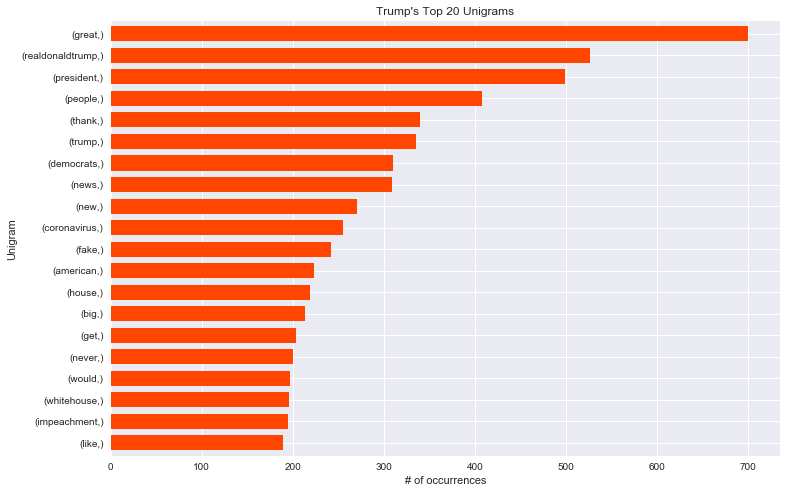

In [24]:
plt.style.use('seaborn')
NUM_NGRAMS = 20

pd.Series(ngrams(trump_tokens, 1)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Unigrams")
plt.ylabel('Unigram')
plt.xlabel('# of occurrences')
trump_unigrams.most_common(NUM_NGRAMS)

[(('trump',), 463),
 (('donald',), 399),
 (('president',), 390),
 (('need',), 317),
 (('nation',), 213),
 (('one',), 208),
 (('people',), 193),
 (('american',), 192),
 (('every',), 181),
 (('country',), 180),
 (('crisis',), 174),
 (('get',), 173),
 (('together',), 158),
 (('make',), 157),
 (('health',), 151),
 (('day',), 149),
 (('time',), 142),
 (('today',), 139),
 (('care',), 132),
 (('help',), 131)]

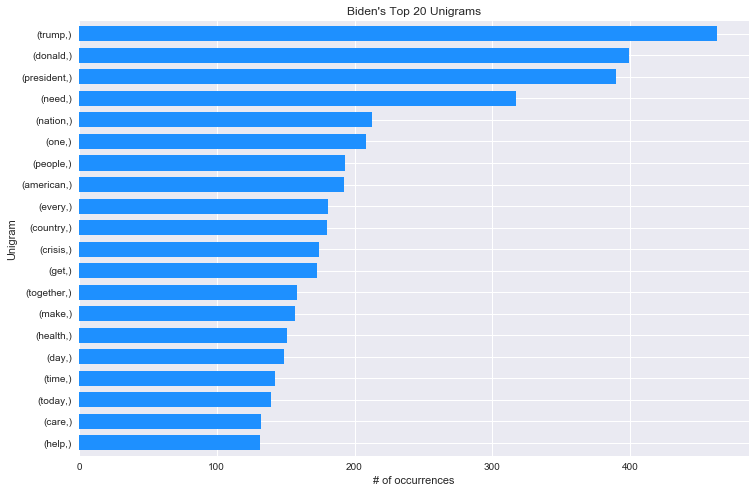

In [25]:
pd.Series(ngrams(biden_tokens, 1)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 Unigrams")
plt.ylabel('Unigram')
plt.xlabel('# of occurrences')
biden_unigrams.most_common(NUM_NGRAMS)

### Bigrams

In [26]:
trump_bigrams = FreqDist(ngrams(trump_tokens, 2))
biden_bigrams = FreqDist(ngrams(biden_tokens, 2))

[(('fake', 'news'), 186),
 (('president', 'realdonaldtrump'), 131),
 (('complete', 'total'), 115),
 (('total', 'endorsement'), 114),
 (('white', 'house'), 93),
 (('president', 'trump'), 92),
 (('united', 'states'), 85),
 (('joe', 'biden'), 76),
 (('radical', 'left'), 73),
 (('new', 'york'), 72),
 (('second', 'amendment'), 67),
 (('great', 'state'), 65),
 (('republican', 'party'), 63),
 (('great', 'job'), 62),
 (('military', 'vets'), 62),
 (('sleepy', 'joe'), 61),
 (('mini', 'mike'), 57),
 (('american', 'people'), 52),
 (('nothing', 'democrats'), 51),
 (('small', 'businesses'), 50)]

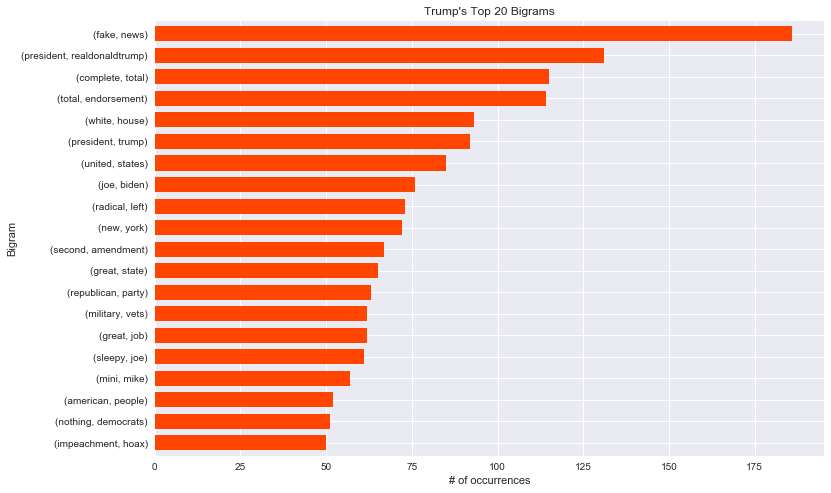

In [27]:
pd.Series(ngrams(trump_tokens, 2)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Bigrams")
plt.ylabel('Bigram')
plt.xlabel('# of occurrences')
trump_bigrams.most_common(NUM_NGRAMS)

[(('donald', 'trump'), 345),
 (('health', 'care'), 87),
 (('white', 'house'), 80),
 (('american', 'people'), 70),
 (('need', 'president'), 60),
 (('donald', 'trumps'), 53),
 (('president', 'trump'), 50),
 (('soul', 'nation'), 49),
 (('need', 'help'), 47),
 (('every', 'day'), 42),
 (('beat', 'donald'), 42),
 (('across', 'country'), 33),
 (('make', 'sure'), 30),
 (('battle', 'soul'), 30),
 (('climate', 'change'), 30),
 (('front', 'lines'), 30),
 (('south', 'carolina'), 29),
 (('public', 'health'), 27),
 (('four', 'years'), 27),
 (('come', 'together'), 26)]

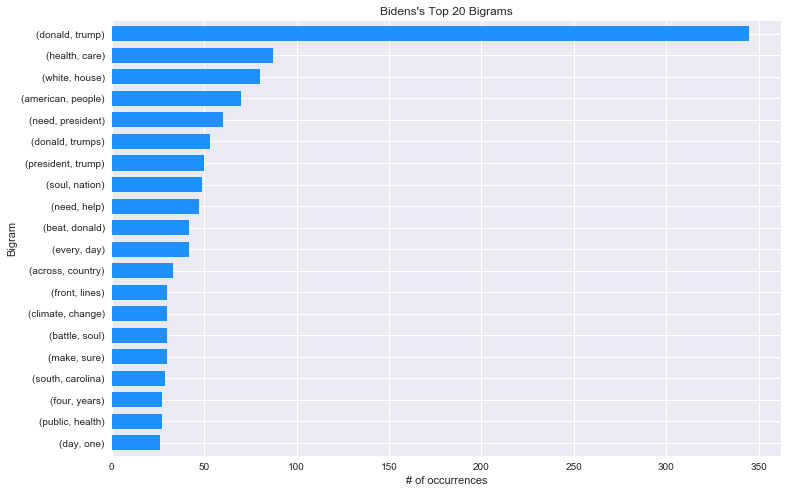

In [28]:
# Plotting
pd.Series(ngrams(biden_tokens, 2)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Bidens's Top 20 Bigrams")
plt.ylabel('Bigram')
plt.xlabel('# of occurrences')
biden_bigrams.most_common(NUM_NGRAMS)

### Trigrams

In [29]:
trump_trigrams = FreqDist(ngrams(trump_tokens, 3))
biden_trigrams = FreqDist(ngrams(biden_tokens, 3))

[(('complete', 'total', 'endorsement'), 113),
 (('coronavirus', 'task', 'force'), 37),
 (('whitehouse', 'president', 'realdonaldtrump'), 32),
 (('fake', 'news', 'media'), 29),
 (('approval', 'rating', 'republican'), 28),
 (('rating', 'republican', 'party'), 28),
 (('whitehouse', 'live', 'press'), 27),
 (('live', 'press', 'briefing'), 27),
 (('press', 'briefing', 'coronavirus'), 27),
 (('briefing', 'coronavirus', 'task'), 27),
 (('fake', 'news', 'cnn'), 25),
 (('loves', 'military', 'vets'), 25),
 (('radical', 'left', 'nothing'), 24),
 (('sleepy', 'joe', 'biden'), 23),
 (('left', 'nothing', 'democrats'), 23),
 (('mini', 'mike', 'bloomberg'), 21),
 (('supporter', 'maga', 'agenda'), 20),
 (('republican', 'party', 'thank'), 17),
 (('keep', 'america', 'great'), 17),
 (('make', 'america', 'great'), 16)]

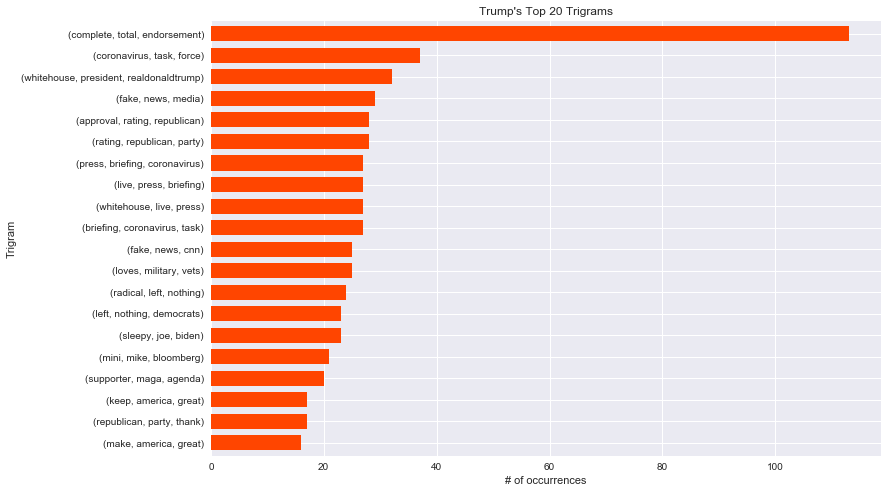

In [30]:
pd.Series(ngrams(trump_tokens, 3)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Trigrams")
plt.ylabel('Trigram')
plt.xlabel('# of occurrences')
trump_trigrams.most_common(NUM_NGRAMS)

[(('beat', 'donald', 'trump'), 41),
 (('battle', 'soul', 'nation'), 30),
 (('defeat', 'donald', 'trump'), 21),
 (('trump', 'white', 'house'), 20),
 (('keep', 'momentum', 'going'), 20),
 (('health', 'care', 'workers'), 18),
 (('gun', 'violence', 'epidemic'), 17),
 (('donald', 'trump', 'white'), 16),
 (('end', 'gun', 'violence'), 16),
 (('tune', 'watch', 'live'), 16),
 (('make', 'voice', 'heard'), 15),
 (('front', 'lines', 'crisis'), 14),
 (('restore', 'soul', 'nation'), 14),
 (('every', 'single', 'day'), 13),
 (('four', 'years', 'donald'), 13),
 (('front', 'lines', 'fight'), 13),
 (('get', 'donald', 'trump'), 13),
 (('get', 'white', 'house'), 13),
 (('public', 'health', 'crisis'), 12),
 (('american', 'people', 'deserve'), 12)]

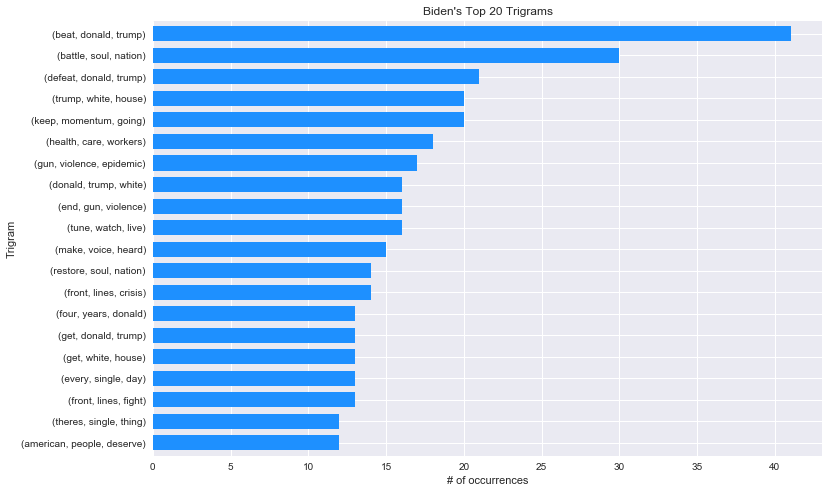

In [31]:
pd.Series(ngrams(biden_tokens, 3)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 Trigrams")
plt.ylabel('Trigram')
plt.xlabel('# of occurrences')
biden_trigrams.most_common(NUM_NGRAMS)

### 4-5 grams

[(('approval', 'rating', 'republican', 'party'), 28),
 (('whitehouse', 'live', 'press', 'briefing'), 27),
 (('live', 'press', 'briefing', 'coronavirus'), 27),
 (('press', 'briefing', 'coronavirus', 'task'), 27),
 (('briefing', 'coronavirus', 'task', 'force'), 27),
 (('whitehouse', 'live', 'press', 'briefing', 'coronavirus'), 27),
 (('live', 'press', 'briefing', 'coronavirus', 'task'), 27),
 (('press', 'briefing', 'coronavirus', 'task', 'force'), 27),
 (('radical', 'left', 'nothing', 'democrats'), 21),
 (('rating', 'republican', 'party', 'thank'), 16),
 (('approval', 'rating', 'republican', 'party', 'thank'), 16),
 (('white', 'house', 'news', 'conference'), 14),
 (('whitehouse', 'live', 'president', 'realdonaldtrump'), 12),
 (('complete', 'total', 'endorsement', 'congressman'), 11),
 (('complete', 'total', 'endorsement', 'vote'), 10),
 (('military', 'vets', 'second', 'amendment'), 9),
 (('white', 'house', 'press', 'conference'), 9),
 (('supporter', 'maga', 'agenda', 'strong'), 8),
 (('m

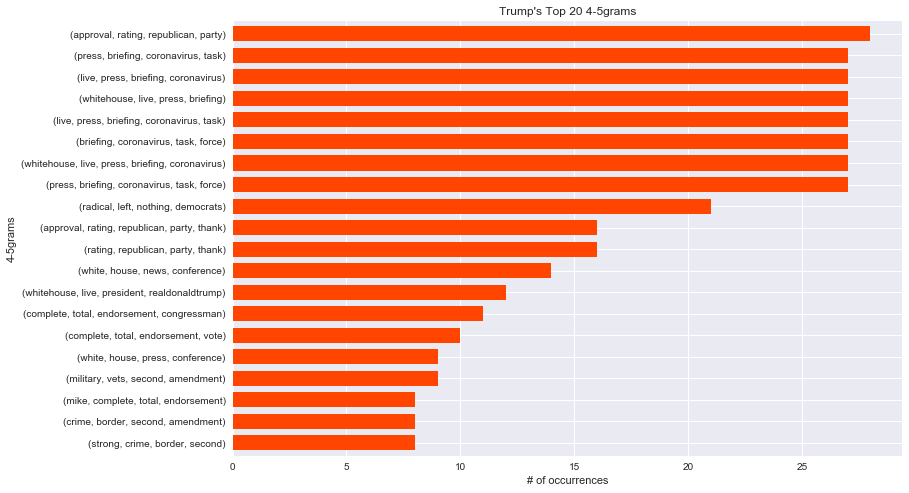

In [32]:
pd.Series(everygrams(trump_tokens, min_len= 4, max_len=5)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 4-5grams")
plt.ylabel('4-5grams')
plt.xlabel('# of occurrences')

trump_4_5_grams = FreqDist(everygrams(trump_tokens, min_len= 4, max_len=5))
trump_4_5_grams.most_common(NUM_NGRAMS)

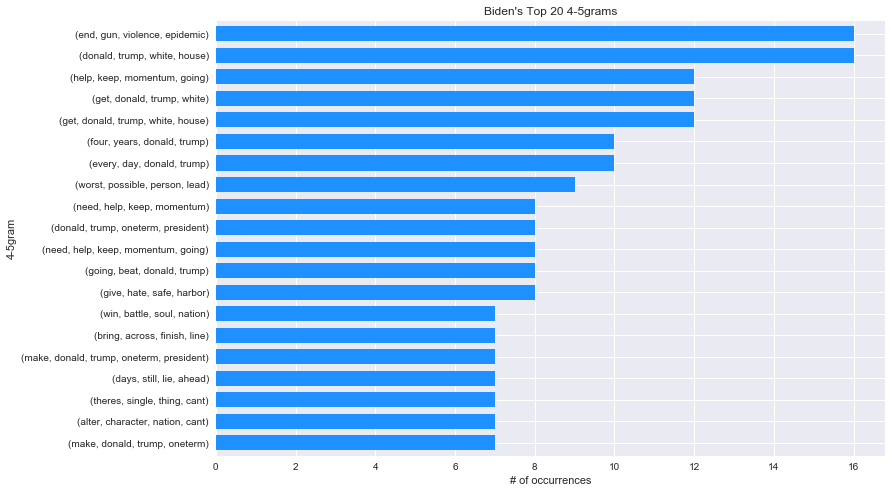

In [33]:
pd.Series(everygrams(biden_tokens, min_len= 4, max_len=5)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 4-5grams")
plt.ylabel('4-5gram')
plt.xlabel('# of occurrences')

biden_4_5_grams = FreqDist(everygrams(biden_tokens, min_len= 4, max_len=5)).most_common(NUM_NGRAMS)

From the above n-grams, it seems that Biden talks a lot about gun violence and healthcare, while Trump talks a lot about the coronavirus task force and republican party ratings. They also both mention each other a lot. Question is, how much? 

## How many times do they mention each other?

In [34]:
trump_tweets_contain_biden = trump_df[trump_df['text'].str.lower().str.contains("joe|biden")]
print(len(trump_tweets_contain_biden), "Trump tweets mention Joe Biden.")
trump_mention_biden_percent = round(100 * len(trump_tweets_contain_biden)/ len(trump_df), 2)
print("That means", trump_mention_biden_percent,  "% of Trump tweets mention Joe Biden")

227 Trump tweets mention Joe Biden.
That means 4.92 % of Trump tweets mention Joe Biden


In [35]:
biden_tweets_contain_trump = biden_df[biden_df['text'].str.lower().str.contains("trump|donald")]
print(len(biden_tweets_contain_trump), "Biden tweets mention Donald Trump.")
biden_mention_trump_percent = round(100 * len(biden_tweets_contain_trump)/ len(biden_df), 2)
print("That means", biden_mention_trump_percent,  "% of Biden tweets mention Donald Trump")

517 Biden tweets mention Donald Trump.
That means 30.85 % of Biden tweets mention Donald Trump


## How many times do they mention the coronavirus? 

In [36]:
corona_regex = "covid|corona|virus|pandemic"
biden_tweets_relate_corona = biden_df[biden_df['text'].str.lower().str.contains(corona_regex)]
print(len(biden_tweets_relate_corona))
biden_tweets_relate_corona_percent = round(100 * len(biden_tweets_relate_corona)/ len(biden_df), 2)
print("That means", biden_tweets_relate_corona_percent,  "% of Biden tweets mention coronavirus")

219
That means 13.07 % of Biden tweets mention coronavirus


In [37]:
trump_tweets_relate_corona = trump_df[trump_df['text'].str.lower().str.contains(corona_regex)]
print(len(trump_tweets_relate_corona))
trump_tweets_relate_corona_percent = round(100 * len(trump_tweets_relate_corona)/ len(trump_df), 2)
print("That means", trump_tweets_relate_corona_percent,  "% of Trump tweets mention coronavirus")

443
That means 9.6 % of Trump tweets mention coronavirus


Though Biden has less tweets about the coronavirus pandemic, this is due to Biden tweeting less than Trump overall. In relation to the rest of their tweets, Biden has a higher focus on the coronavirus pandemic than Trump. Also while only ~5% of Trump tweets mention Joe Biden, nearly 31% of Biden tweets mention Trump.

# How frequently do they tweet? Has the frequency of tweets changed as the pandemic evolved?

### Trump

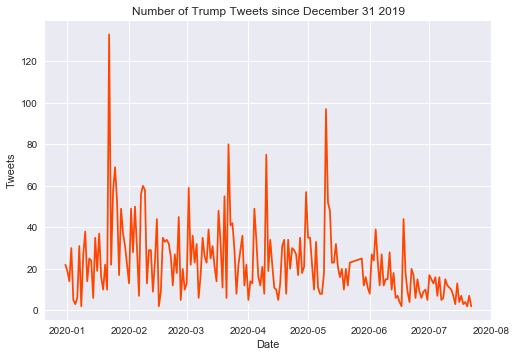

In [39]:
trump_tweet_by_date = trump_df.groupby(by=trump_df['created_at'].dt.date).count()['text']
plt.plot(trump_tweet_by_date.index.values, trump_tweet_by_date, color='orangered')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Number of Trump Tweets since December 31 2019')
plt.show()

### Biden

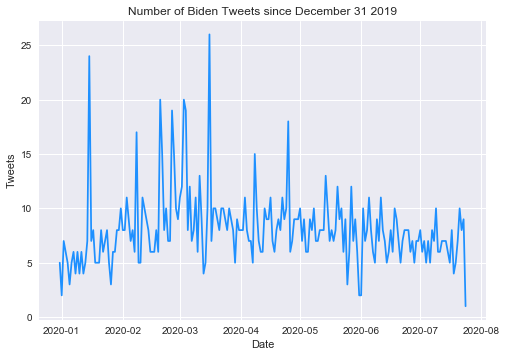

In [42]:
biden_tweet_by_date = biden_df.groupby(by=biden_df['created_at'].dt.date).count()['text']
plt.plot(biden_tweet_by_date.index.values, biden_tweet_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Number of Biden Tweets since December 31 2019')
plt.show()

### Both candidates on the same figure

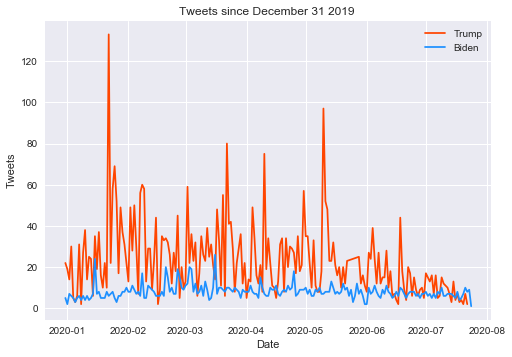

In [46]:
plt.plot(trump_tweet_by_date.index.values, trump_tweet_by_date, 'orangered')
plt.plot(biden_tweet_by_date.index.values, biden_tweet_by_date, 'dodgerblue')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Tweets since December 31 2019 ')
plt.legend(['Trump', 'Biden'])
plt.show()

From the graphs above, it seems that there are peaks and valleys. Future work would be to investigate the dates with more tweets than normal to see if those are linked with news events. Moreover, the variance in the number of tweets brings up the question if they tweet more on certain days over others?

## Do they prefer to tweet on certain days over others?

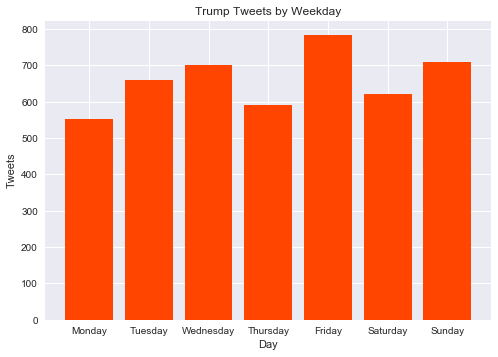

In [47]:
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

trump_tweets_by_weekday = trump_df.groupby(by=trump_df['created_at'].dt.day_name()).count().reindex(weekdays)['text']
plt.bar(trump_tweets_by_weekday.index.values, trump_tweets_by_weekday, color='orangered')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.title('Trump Tweets by Weekday')
plt.show()

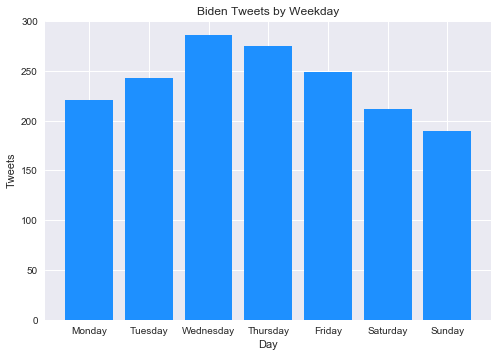

In [48]:
biden_tweets_by_weekday = biden_df.groupby(by=biden_df['created_at'].dt.day_name()).count().reindex(weekdays)['text']
plt.bar(biden_tweets_by_weekday.index.values, biden_tweets_by_weekday, color='dodgerblue')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.title('Biden Tweets by Weekday')
plt.show()

It seems that Biden tends to tweet most during the middle of the week and tapers off on the weekend. Whereas Trump tends to tweet consistently with a tendency to tweet more on Fridays and Sundays, and less on Mondays and Thursdays.

# 5. Sentiment Analysis<a class="anchor" id="sentiment_analysis">

## Get polarity and subjectivity scores for candidate tweets

In [49]:
# Measure subjectivity of a text. Subjectivity is in the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Use polarity as a measure for sentiment. Polarity is in the range [-1.0, 1.0] where -1 is negative and +1 is positive sentiment
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [50]:
trump_df['Subjectivity'] = trump_df['clean_text'].apply(get_subjectivity)
trump_df['Polarity'] = trump_df['clean_text'].apply(get_polarity)

biden_df['Subjectivity'] = biden_df['clean_text'].apply(get_subjectivity)
biden_df['Polarity'] = biden_df['clean_text'].apply(get_polarity)

In [51]:
print(trump_df['Polarity'])
print(trump_df['Subjectivity'])

0       0.000000
1       0.250000
2       0.000000
3       0.144444
4       0.150000
          ...   
5181    0.087714
5182    0.588889
5183    0.164444
5184    0.186667
5185    0.008333
Name: Polarity, Length: 4615, dtype: float64
0       0.400000
1       0.237500
2       0.750000
3       0.277778
4       0.416667
          ...   
5181    0.219429
5182    0.729167
5183    0.380000
5184    0.356667
5185    0.425000
Name: Subjectivity, Length: 4615, dtype: float64


## Assign positive, neutral, and negative labels to tweets based on polarity

In [52]:
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [53]:
trump_df['Sentiment'] = trump_df['Polarity'].apply(get_sentiment)
biden_df['Sentiment'] = biden_df['Polarity'].apply(get_sentiment)

In [54]:
trump_df['Sentiment']

0        Neutral
1       Positive
2        Neutral
3       Positive
4       Positive
          ...   
5181    Positive
5182    Positive
5183    Positive
5184    Positive
5185    Positive
Name: Sentiment, Length: 4615, dtype: object

## Most Positive and Negative Tweets

### Trump

In [55]:
trump_most_positive = trump_df[trump_df['Polarity'] == 1.0]
print("Trump has", len(trump_most_positive), "tweets with polarity = 1.0:\n" )

for idx, tweet in enumerate(trump_most_positive['text']):
    print(idx, tweet)
    print()

Trump has 37 tweets with polarity = 1.0:

0 I built the greatest economy in the World the best the U.S. has ever had. I am doing it again!

1 ...AND THE BEST IS YET TO COME!

2 RT @TeamTrump: President @realDonaldTrump: We are going to build the greatest economy in the world AGAIN! https://t.co/QzGf0kk137

3 RT @ErinMPerrine: 🚨🚨 TUNE IN NOW 🚨🚨Tonight’s @TeamTrump Online! has two of the best —&gt; @LaraLeaTrump &amp; @kevinomccarthy talking about Slee…

4 RT @WhiteHouse: We built the greatest economy in the world—and together we will build it again! https://t.co/57gxhVH2k2

5 RT @BrandonBeckham_: @realDonaldTrump 🇺🇸 We've seen the greatest mobilization of industry since World War IIPresident @realDonaldTrump is…

6 The Democrat’s Best &amp; Finest! https://t.co/xAmbP1Nnm0

7 RT @flightcrew: MUST WATCH!! Best Trump Ad Ever!! 📺"FIGHTER" Starts Airing TODAY Nationwide!! @realDonaldTrump https://t.co/8KC2Qzg492

8 ....We have the greatest healthcare system experts scientists and doctors any

In [56]:
trump_most_negative = trump_df[trump_df['Polarity'] == -1.0]
print("Trump has", len(trump_most_negative), "tweets with polarity = -1.0:\n" )

for idx, tweet in enumerate(trump_most_negative['text']):
    print(idx, tweet)
    print()

Trump has 18 tweets with polarity = -1.0:

0 So terrible! https://t.co/hSI9f2WW58

1 RT @dbongino: Brit Hume: Mueller report coverage 'worst journalistic fiasco' he's seen in 50-year news caree https://t.co/bYiMt30Kar

2 RT @Chicago1Ray: @LVNancy @pinkk9lover @RealBasedMAGA @ROCKONOHIO @ATX_PATRIOT @oUSA_JEDIo @MazurikL @megdogwuff @VFL2013 @CB618444 WORST E…

3 ....are getting caught doing very evil things and Republicans should take note. This was grave misconduct by the Obama Justice Department! @GovChristie

4 RT @GreggJarrett: Schumer’s Pathetic Attempt to Chastise Trump Backfires https://t.co/zInB8dLRMK

5 RT @MZanona: House Minority Leader Kevin McCarthy said it's “disgusting” that Dems are pushing to include money for mail-in voting in the n…

6 RT @SheerLevity: @bdomenech People are dying and the dems do this. It's literally the definition of evil. We've never seen a crisis like th…

7 RT @SenJohnBarrasso: Outrageous. @SenatorFischer’s bill will save lives.

8 “Sotomayor accus

### Biden

In [57]:
biden_most_positive = biden_df[biden_df['Polarity'] == 1.0]
print("Biden has", len(biden_most_positive), "tweets with polarity = 1.0:\n" )

for idx, tweet in enumerate(biden_most_positive['text']):
    print(idx, tweet)
    print()

Biden has 11 tweets with polarity = 1.0:

0 The health care workers on the frontlines of this fight are some of the greatest heroes our nation has ever seen. https://t.co/Ry6TvJcbuU

1 It’s in some of our darkest moments of despair that we’ve made some of our greatest progress. If we stand together, as one America, we'll rise stronger than before. https://t.co/buzkmkM1Gf

2 It’s in some of our darkest moments of despair that we’ve made some of our greatest progress — and we have that chance once again. We’re not just going to rebuild this nation — we’re going to transform it. 

There is nothing we can’t do if we do it together. https://t.co/iozMdaLtAw

3 Make no mistake: I believe our best days still lie ahead. We can and will transform this nation — together.

4 As Muslim families across America and around the world celebrate the beginning of Ramadan, @DrBiden and I want to extend our best wishes to all who are observing this holy month. Ramadan Mubarak. https://t.co/mhKD5YSN85

5 Thi

In [58]:
biden_most_negative = biden_df[biden_df['Polarity'] == -1.0]
print("Biden has", len(biden_most_negative), "tweets with polarity = -1.0:\n" )

for idx, tweet in enumerate(biden_most_negative['text']):
    print(idx, tweet)
    print()

Biden has 1 tweets with polarity = -1.0:

0 Families across the country are impacted by COVID-19—and it can be especially difficult to explain to children. 

Jill and I spoke with ItsJudysLife, JHouseVlogs and The Curly Coopers to answer their questions about the crisis. Tune in on Sunday at 7PM ET: https://t.co/xk0GcS7PGq https://t.co/TUQnhOroTU



## Visualize Sentiment Analysis

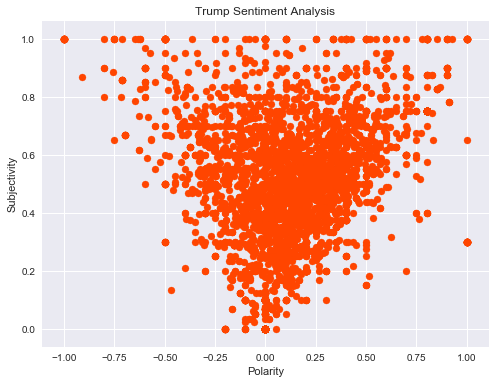

In [59]:
plt.figure(figsize=(8,6)) 
plt.scatter(trump_df["Polarity"], trump_df["Subjectivity"], color='orangered')            
plt.title('Trump Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

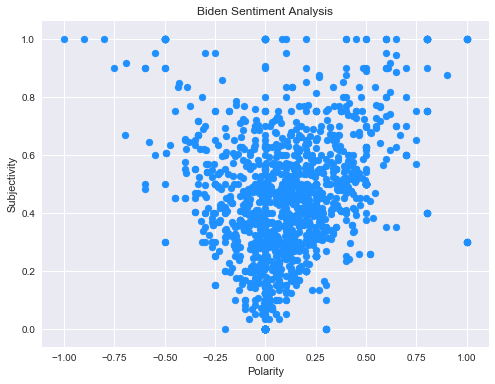

In [60]:
plt.figure(figsize=(8,6)) 
plt.scatter(biden_df["Polarity"], biden_df["Subjectivity"], color='dodgerblue') 

plt.title('Biden Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

### View the counts of positive, netural, and negative tweets

In [61]:
trump_df['Sentiment'].value_counts()

Positive    2424
Neutral     1208
Negative     983
Name: Sentiment, dtype: int64

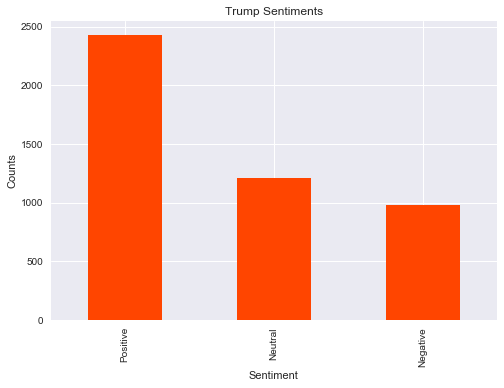

In [62]:
plt.title('Trump Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
trump_df['Sentiment'].value_counts().plot(kind = 'bar', color='orangered')
plt.show()

In [63]:
biden_df['Sentiment'].value_counts()

Positive    906
Neutral     396
Negative    374
Name: Sentiment, dtype: int64

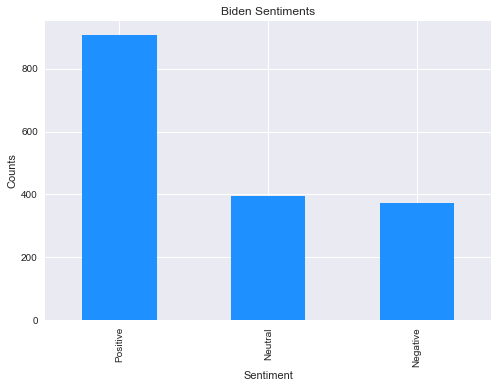

In [64]:
plt.title('Biden Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
biden_df['Sentiment'].value_counts().plot(kind = 'bar', color='dodgerblue')
plt.show()

## Percentage of positive/negative tweets of each candidate

### Trump

In [65]:
positive_trump_tweets = trump_df[trump_df.Sentiment == 'Positive']
positive_trump_percent = round(len(positive_trump_tweets) / len(trump_df) * 100, 2)
print(positive_trump_percent, '% of trump tweets are positive.')

52.52 % of trump tweets are positive.


In [66]:
# Get % of trump tweets that are neutral
neutral_trump_tweets = trump_df[trump_df.Sentiment == 'Neutral']
neutral_trump_percent = round(len(neutral_trump_tweets) / len(trump_df) * 100, 2)
print(neutral_trump_percent,'% of trump tweets are neutral.')

26.18 % of trump tweets are neutral.


In [67]:
negative_trump_tweets = trump_df[trump_df.Sentiment == 'Negative']
negative_trump_percent = round(len(negative_trump_tweets) / len(trump_df) * 100, 2)
print(negative_trump_percent, '% of trump tweets are negative.')

21.3 % of trump tweets are negative.


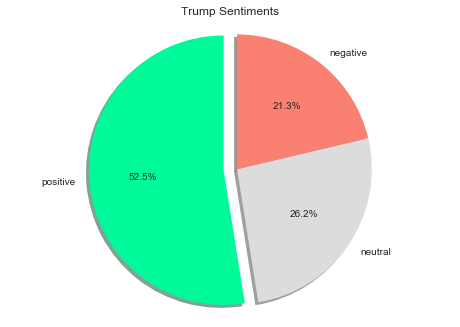

In [68]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sentiments = ['positive', 'neutral', 'negative']
percentages = [positive_trump_percent, neutral_trump_percent, negative_trump_percent]
explode = [0.1, 0, 0]

fig1, ax1 = plt.subplots()
pie_colors = ['mediumspringgreen', 'gainsboro', 'salmon']
ax1.pie(percentages, explode=explode, labels=sentiments, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pie_colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Trump Sentiments")
plt.show()

### Biden

In [69]:
positive_biden_tweets = biden_df[biden_df.Sentiment == 'Positive']
positive_biden_percent = round(len(positive_biden_tweets) / len(biden_df) * 100, 2)
print(positive_biden_percent, '% of biden tweets are positive.')

54.06 % of biden tweets are positive.


In [70]:
neutral_biden_tweets = biden_df[biden_df.Sentiment == 'Neutral']
neutral_biden_percent = round(len(neutral_biden_tweets) / len(biden_df) * 100, 2)
print(neutral_biden_percent, '% of biden tweets are neutral.')

23.63 % of biden tweets are neutral.


In [71]:
negative_biden_tweets = biden_df[biden_df.Sentiment == 'Negative']
negative_biden_percent = round(len(negative_biden_tweets) / len(biden_df) * 100, 2)
print(negative_biden_percent, '% of biden tweets are negative.')

22.32 % of biden tweets are negative.


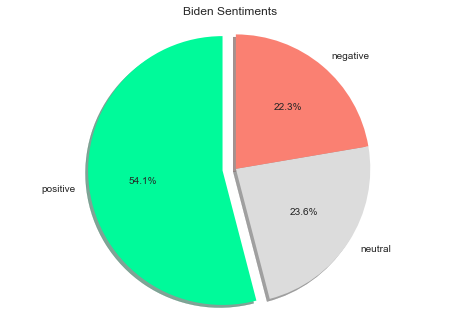

In [72]:
percentages = [positive_biden_percent, neutral_biden_percent, negative_biden_percent]

fig2, ax2 = plt.subplots()
ax2.pie(percentages, explode=explode, labels=sentiments, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pie_colors)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Biden Sentiments")
plt.show()

Here we observe a result I was not expecting: Biden's tweets are more polarizing than Trump's. 54.06% of Biden tweets are positive and 23.69% of them are negative, while 52.55% of Trump's tweets are positive and 21.33% are negative. 

## Did their sentiments change as the pandemic evolved?

### Trump

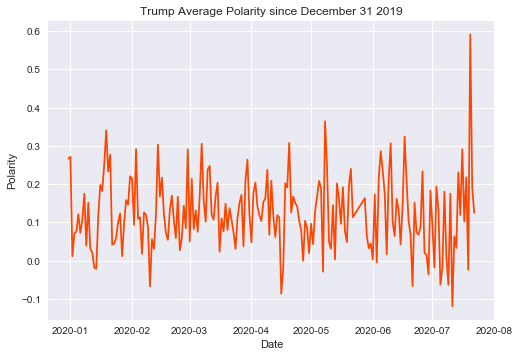

In [73]:
trump_polarity_by_date = trump_df.groupby(by=trump_df['created_at'].dt.date).mean()['Polarity']
plt.plot(trump_polarity_by_date.index.values, trump_polarity_by_date, color='orangered')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Trump Average Polarity since December 31 2019')
plt.show()

### Biden

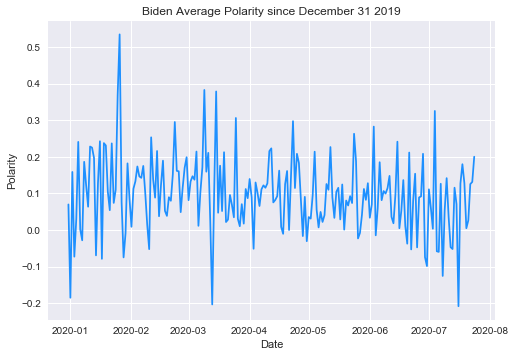

In [74]:
biden_polarity_by_date = biden_df.groupby(by=biden_df['created_at'].dt.date).mean()['Polarity']
plt.plot(biden_polarity_by_date.index.values, biden_polarity_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Biden Average Polarity since December 31 2019')
plt.show()

### Both on one plot

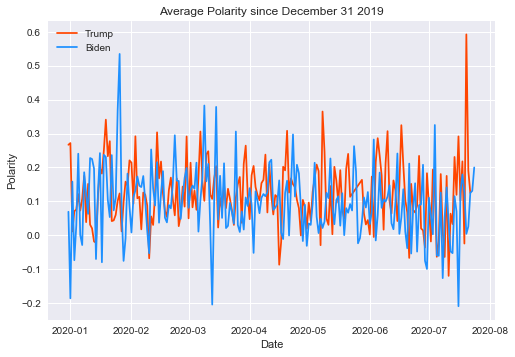

In [75]:
plt.plot(trump_polarity_by_date.index.values, trump_polarity_by_date, color='orangered')
plt.plot(biden_polarity_by_date.index.values, biden_polarity_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Average Polarity since December 31 2019')
plt.legend(['Trump', 'Biden'])
plt.show()

# 6. Topic Modeling with [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)<a class="anchor" id="topic_modeling">

In the literature, it seems that the biterm topic model (BTM) outperforms the traditional LDA algorithm for shorter text documents such as tweets [[source](https://www.cs.toronto.edu/~jstolee/projects/topic.pdf), [source](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.402.4032&rep=rep1&type=pdf)].

Future work can include comparing the results of these two models and seeing if we observe the suggested improvements. 

# Peprocess data for topic modelling
Remove words with fewer than three characters, perform lemmatization and stemming, include custom stopwords for each candidate to improve topic modelling. 

In [108]:
# Define functions for topic model preprocessing
custom_trump_stopwords = ['realdonaldtrump', 'great', 'pass']
def stem_and_lemmatize(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text))


def lda_processing(tokens):
    result = []
    for token in tokens:
        if token not in custom_trump_stopwords:
#         if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in custom_trump_stopwords:
            result.append(stem_and_lemmatize(token))
    return result

In [86]:
trump_df['processed_tokens'] = trump_df['tokens'].apply(lda_processing)
biden_df['processed_tokens'] = biden_df['tokens'].apply(lda_processing)

Before preprocessing:

In [87]:
trump_df['tokens'].head(20)

0     [deeply, saddened, loss, friend, charles, ever...
1     [must, protect, national, parks, children, gra...
2     [mailin, voting, unless, changed, courts, lead...
3     [strong, stock, market, numbers, want, see, di...
4     [view, general, flynn, never, prosecuted, firs...
5     [never, hear, fake, news, concerning, china, v...
6     [tremendous, progress, made, vaccines, therape...
7     [looking, forward, live, sports, time, witness...
8     [thank, good, reviews, comments, interview, ch...
9     [united, effort, defeat, invisible, china, vir...
10                 [congratulations, allen, great, job]
11    [catch, obama, biden, even, mention, rest, cre...
12    [radical, left, democrats, totally, control, b...
13    [trying, help, portland, hurt, leadership, mon...
15    [oregon, officials, running, scared, comes, po...
17    [saddened, hear, news, civil, rights, hero, jo...
18                                  [great, job, tammy]
19    [corrupt, joe, biden, wants, defund, polic

After preprocessing:

In [88]:
trump_df['processed_tokens'].head(20)

0     [deepli, sadden, loss, friend, charl, ever, ch...
1     [must, protect, nation, park, child, grandchil...
2     [mailin, vote, unless, chang, court, lead, cor...
3     [strong, stock, market, number, want, see, div...
4     [view, gener, flynn, never, prosecut, first, p...
5     [never, hear, fake, news, concern, china, viru...
6          [tremend, progress, made, vaccin, therapeut]
7     [look, forward, live, sport, time, wit, player...
8     [thank, good, review, comment, interview, chri...
9     [unit, effort, defeat, invis, china, viru, man...
10                              [congratul, allen, job]
11    [catch, obama, biden, even, mention, rest, cre...
12    [radic, left, democrat, total, control, biden,...
13    [tri, help, portland, hurt, leadership, month,...
15         [oregon, offici, run, scare, come, portland]
17    [sadden, hear, news, civil, right, hero, john,...
18                                         [job, tammi]
19    [corrupt, joe, biden, want, defund, polic,

In [89]:
trump_processed_tokens = trump_df['processed_tokens']
biden_processed_tokens = biden_df['processed_tokens']

## Create bags of words on the datasets

In [90]:
trump_dictionary = gensim.corpora.Dictionary(trump_processed_tokens)
biden_dictionary = gensim.corpora.Dictionary(biden_processed_tokens)

In [91]:
print("Number of words in Trump dictionary:", len(trump_dictionary))
print("Number of words in Biden dictionary:", len(biden_dictionary))

Number of words in Trump dictionary: 8016
Number of words in Biden dictionary: 3359


In [92]:
# Filter out tokens that appear in less than 10 tweets or more than half the tweets
trump_dictionary.filter_extremes(no_below=10, no_above=0.5)
biden_dictionary.filter_extremes(no_below=10, no_above=0.5)

In [93]:
print("Number of words in Trump dictionary after filtering extremes:", len(trump_dictionary))
print("Number of words in Biden dictionary after filtering extremes:", len(biden_dictionary))

Number of words in Trump dictionary after filtering extremes: 1170
Number of words in Biden dictionary after filtering extremes: 586


In [95]:
trump_bow_corpus = [trump_dictionary.doc2bow(tweet) for tweet in trump_processed_tokens]
biden_bow_corpus = [biden_dictionary.doc2bow(tweet) for tweet in biden_processed_tokens]

## Improve bag of words with TF-IDF
We can perform topic modelling directly with our bag of words, but we can further improve it first by incorporating [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). 

In [97]:
trump_tfidf = models.TfidfModel(trump_bow_corpus)
biden_tfidf = models.TfidfModel(biden_bow_corpus)

trump_tfidf_corpus = trump_tfidf[trump_bow_corpus]
biden_tfidf_corpus = biden_tfidf[biden_bow_corpus]

## Train the LDA models with different number of clusters

In [98]:
NUM_WORKERS = 3
NUM_PASSES = 15
trump_lda_3 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=3, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_3.save('trump_lda/trump_lda_3.gensim')

In [99]:
trump_lda_5 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=5, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_5.save('trump_lda/trump_lda_5.gensim')

In [100]:
trump_lda_7 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=7, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_7.save('trump_lda/trump_lda_7.gensim')

In [101]:
trump_lda_10 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=10, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_10.save('trump_lda/trump_lda_10.gensim')

In [102]:
biden_lda_3 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=3, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_3.save('biden_lda/biden_lda_3.gensim')

In [103]:
biden_lda_5 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=5, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_5.save('biden_lda/biden_lda_5.gensim')

In [104]:
biden_lda_7 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=7, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_7.save('biden_lda/biden_lda_7.gensim')

In [105]:
biden_lda_10 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=10, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_10.save('biden_lda/biden_lda_10.gensim')

## Look at words in each topic with their relative weights

### Trump

In [106]:
for idx, topic in trump_lda_5.print_topics(num_words=7):
    print("Topic %d:" %idx, topic)

Topic 0: 0.009*"complet" + 0.009*"endors" + 0.008*"total" + 0.008*"border" + 0.007*"america" + 0.007*"strong" + 0.007*"keep"
Topic 1: 0.010*"white" + 0.009*"hous" + 0.008*"trump" + 0.008*"american" + 0.008*"confer" + 0.008*"thank" + 0.007*"presid"
Topic 2: 0.007*"coronaviru" + 0.007*"new" + 0.007*"impeach" + 0.007*"democrat" + 0.006*"work" + 0.006*"get" + 0.005*"trump"
Topic 3: 0.014*"fake" + 0.014*"news" + 0.009*"medium" + 0.008*"democrat" + 0.008*"impeach" + 0.007*"peopl" + 0.007*"day"
Topic 4: 0.021*"thank" + 0.011*"presid" + 0.011*"joe" + 0.010*"whitehous" + 0.009*"biden" + 0.009*"live" + 0.008*"state"


### Biden

In [107]:
for idx, topic in biden_lda_5.print_topics(num_words=7):
    print("Topic %d:" %idx, topic)

Topic 0: 0.018*"help" + 0.014*"head" + 0.014*"chip" + 0.013*"vote" + 0.013*"today" + 0.012*"make" + 0.011*"carolina"
Topic 1: 0.014*"trump" + 0.013*"donald" + 0.012*"tune" + 0.011*"covid19" + 0.011*"presid" + 0.010*"crisi" + 0.010*"test"
Topic 2: 0.011*"care" + 0.011*"gun" + 0.010*"end" + 0.010*"american" + 0.010*"demdeb" + 0.009*"stronger" + 0.009*"presid"
Topic 3: 0.015*"togeth" + 0.014*"presid" + 0.011*"nation" + 0.010*"thing" + 0.009*"trump" + 0.009*"unit" + 0.009*"one"
Topic 4: 0.015*"life" + 0.015*"thank" + 0.013*"worker" + 0.013*"need" + 0.013*"protect" + 0.011*"mask" + 0.009*"enough"


## Test models on a new unseen tweet

### Trump

In [115]:
unseen_trump_tweet = 'Big China Virus breakouts all over the World, including nations which were thought to have done a great job. The Fake News doesn’t report this. USA will be stronger than ever before, and soon!'
trump_bow_vector = trump_dictionary.doc2bow(lda_processing(basic_processing(unseen_trump_tweet)))

for index, score in sorted(trump_lda_5[trump_bow_vector], key=lambda t: t[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, trump_lda_5.print_topic(index, topn=5)))

Score: 0.9544367790222168	 Topic: 0.014*"fake" + 0.014*"news" + 0.009*"medium" + 0.008*"democrat" + 0.008*"impeach"
Score: 0.011421022936701775	 Topic: 0.021*"thank" + 0.011*"presid" + 0.011*"joe" + 0.010*"whitehous" + 0.009*"biden"
Score: 0.01141835656017065	 Topic: 0.007*"coronaviru" + 0.007*"new" + 0.007*"impeach" + 0.007*"democrat" + 0.006*"work"
Score: 0.011411523446440697	 Topic: 0.009*"complet" + 0.009*"endors" + 0.008*"total" + 0.008*"border" + 0.007*"america"
Score: 0.011312323622405529	 Topic: 0.010*"white" + 0.009*"hous" + 0.008*"trump" + 0.008*"american" + 0.008*"confer"


### Biden

In [116]:
unseen_biden_tweet = 'Our planet can’t take four more years of Donald Trump. We have to get him out of the White House so we can start treating the climate crisis like the urgent threat it is.'
biden_bow_vector = biden_dictionary.doc2bow(lda_processing(basic_processing(unseen_biden_tweet)))

for index, score in sorted(biden_lda_5[biden_bow_vector], key=lambda t: t[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, biden_lda_5.print_topic(index, topn=5)))

Score: 0.5838702917098999	 Topic: 0.014*"trump" + 0.013*"donald" + 0.012*"tune" + 0.011*"covid19" + 0.011*"presid"
Score: 0.3801233470439911	 Topic: 0.015*"togeth" + 0.014*"presid" + 0.011*"nation" + 0.010*"thing" + 0.009*"trump"
Score: 0.012056293897330761	 Topic: 0.011*"care" + 0.011*"gun" + 0.010*"end" + 0.010*"american" + 0.010*"demdeb"
Score: 0.012017614208161831	 Topic: 0.018*"help" + 0.014*"head" + 0.014*"chip" + 0.013*"vote" + 0.013*"today"
Score: 0.011932425200939178	 Topic: 0.015*"life" + 0.015*"thank" + 0.013*"worker" + 0.013*"need" + 0.013*"protect"


## Visualize topics

### 3 topics

#### Trump

In [132]:
pyLDAvis.enable_notebook()

trump_lda3_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_3, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda3_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.121534  0.081460       1        1  40.534378
0      0.014010 -0.140026       2        1  32.584229
1     -0.135545  0.058566       3        1  26.881392, topic_info=         Term        Freq       Total Category  logprob  loglift
15      thank  103.000000  103.000000  Default  30.0000  30.0000
115  democrat   68.000000   68.000000  Default  29.0000  29.0000
211    endors   27.000000   27.000000  Default  28.0000  28.0000
63       live   27.000000   27.000000  Default  27.0000  27.0000
210   complet   31.000000   31.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
127     feder   14.236757   21.089439   Topic3  -5.5154   0.9208
117      help   16.592651   36.887840   Topic3  -5.3623   0.5148
539   covid19   15.091853   27.635292   Topic3  -5.4571   0.7088
90      peopl   18.502300   61.803356   Topic3  -5.2533   0.1077
91     presid   17.493425   84.653549   Topic3  -5.3094  -0.2630

[212 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
508       1  0.094892  administr
508       2  0.142338  administr
508       3  0.759136  administr
643       1  0.078751     agenda
643       2  0.078751     agenda
...     ...       ...        ...
195       1  0.371459      world
195       2  0.619098      world
122       1  0.750415      would
122       2  0.202035      would
122       3  0.057724      would

[373 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

#### Biden

In [133]:
biden_lda3_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_3, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda3_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.110977 -0.069053       1        1  37.548698
1     -0.120158 -0.054348       2        1  32.775002
0      0.009181  0.123400       3        1  29.676298, topic_info=        Term       Freq      Total Category  logprob  loglift
54    worker  20.000000  20.000000  Default  30.0000  30.0000
67    health  26.000000  26.000000  Default  29.0000  29.0000
1       care  25.000000  25.000000  Default  28.0000  28.0000
104     join  16.000000  16.000000  Default  27.0000  27.0000
37       pay  15.000000  15.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
109  america   9.491979  22.920464   Topic3  -5.1219   0.3332
169    crisi  10.059606  31.183899   Topic3  -5.0638   0.0834
18    nation  10.340439  35.859821   Topic3  -5.0362  -0.0287
285     time   9.698594  29.812832   Topic3  -5.1003   0.0919
8      trump   9.337889  47.655945   Topic3  -5.1382  -0.4151

[204 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
504       1  0.835612    account
322       3  0.949216    address
77        2  0.896288  administr
77        3  0.059753  administr
109       1  0.392662    america
...     ...       ...        ...
350       2  0.191885      world
350       3  0.639618      world
135       1  0.205802       year
135       2  0.514505       year
135       3  0.257252       year

[299 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

### 5 Topics

#### Trump

In [134]:
trump_lda5_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_5, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda5_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.059588  0.053923       1        1  21.969383
0      0.169403  0.037665       2        1  21.625601
3     -0.071922  0.092149       3        1  19.726112
4     -0.020730 -0.085964       4        1  19.409443
1     -0.017163 -0.097773       5        1  17.269459, topic_info=          Term        Freq       Total Category  logprob  loglift
50        fake   45.000000   45.000000  Default  30.0000  30.0000
211     endors   26.000000   26.000000  Default  29.0000  29.0000
15       thank  102.000000  102.000000  Default  28.0000  28.0000
801      white   27.000000   27.000000  Default  27.0000  27.0000
52        news   59.000000   59.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1001    schiff    8.937873   27.405350   Topic5  -5.5384   0.6358
167      order    8.165177   15.898125   Topic5  -5.6288   1.0899
115   democrat    9.614104   69.393318   Topic5  -5.4655  -0.2203
119        new    8.864252   47.932487   Topic5  -5.5467   0.0685
72        good    8.371272   33.705250   Topic5  -5.6039   0.3634

[342 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
773       4  0.871961    900
5         1  0.096358    act
5         2  0.674508    act
5         4  0.048179    act
5         5  0.192717    act
...     ...       ...    ...
110       2  0.196442   year
110       3  0.280631   year
110       4  0.196442   year
110       5  0.168379   year
809       3  0.694445  young

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])

#### Biden

In [135]:
biden_lda5_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_5, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda5_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.108243  0.051701       1        1  26.656147
3     -0.047224 -0.106835       2        1  23.787426
2     -0.016629 -0.055717       3        1  19.689281
4      0.005755  0.117162       4        1  15.195793
0      0.166341 -0.006311       5        1  14.671352, topic_info=       Term       Freq      Total Category  logprob  loglift
360   thank  23.000000  23.000000  Default  30.0000  30.0000
535    head  12.000000  12.000000  Default  29.0000  29.0000
184    tune  18.000000  18.000000  Default  28.0000  28.0000
202    chip  14.000000  14.000000  Default  27.0000  27.0000
103    help  26.000000  26.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
64      day   8.186754  30.894611   Topic5  -4.5653   0.5912
227     new   6.193282  14.380396   Topic5  -4.8444   1.0769
66    fight   6.232968  19.273121   Topic5  -4.8380   0.7904
10     need   6.724097  45.223164   Topic5  -4.7622   0.0134
54   worker   6.038365  20.510460   Topic5  -4.8697   0.6965

[298 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
164       1  0.237397      access
164       3  0.712191      access
12        2  0.828609  accomplish
504       1  0.165476     account
504       3  0.827381     account
...     ...       ...         ...
135       1  0.051227        year
135       2  0.461045        year
135       3  0.204909        year
135       4  0.102454        year
135       5  0.153682        year

[611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])

### 7 Topics

#### Trump

In [136]:
trump_lda7_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_7, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda7_display


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.029377  0.061473       1        1  16.023912
3     -0.136625 -0.068685       2        1  15.621511
5      0.143144  0.067653       3        1  14.759247
0      0.101352 -0.158666       4        1  14.564826
4      0.025762  0.041659       5        1  14.541324
2     -0.026646  0.041903       6        1  12.513943
1     -0.077611  0.014662       7        1  11.975237, topic_info=       Term       Freq      Total Category  logprob  loglift
52     news  58.000000  58.000000  Default  30.0000  30.0000
693   press  20.000000  20.000000  Default  29.0000  29.0000
211  endors  26.000000  26.000000  Default  28.0000  28.0000
801   white  27.000000  27.000000  Default  27.0000  27.0000
683  confer  22.000000  22.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
0      ever   7.329759  23.256153   Topic7  -5.3707   0.9677
96      job   7.880148  49.638081   Topic7  -5.2983   0.2819
136    come   7.421769  32.155979   Topic7  -5.3582   0.6561
180   trump   7.782057  67.161568   Topic7  -5.3108  -0.0330
90    peopl   7.592644  61.684551   Topic7  -5.3354   0.0275

[438 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
68        4  0.099190   100
68        5  0.198380   100
68        6  0.595141   100
302       3  0.138386   3rd
302       6  0.691932   3rd
...     ...       ...   ...
123       2  0.052586  york
123       3  0.052586  york
123       5  0.578451  york
123       6  0.105173  york
123       7  0.157759  york

[1227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 6, 1, 5, 3, 2])

#### Biden

In [137]:
biden_lda7_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_7, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda7_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005341  0.053366       1        1  18.246637
4     -0.132688 -0.022735       2        1  17.153719
1      0.056162  0.042140       3        1  15.314360
0     -0.073225 -0.060846       4        1  14.620255
3      0.120058 -0.141893       5        1  11.773134
5     -0.063906  0.029962       6        1  11.536005
6      0.088258  0.100005       7        1  11.355883, topic_info=          Term       Freq      Total Category  logprob  loglift
184       tune  20.000000  20.000000  Default  30.0000  30.0000
63       watch  15.000000  15.000000  Default  29.0000  29.0000
7         test  17.000000  17.000000  Default  28.0000  28.0000
9       listen  13.000000  13.000000  Default  27.0000  27.0000
239    respons  17.000000  17.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
77   administr   4.652353  16.559666   Topic7  -4.8743   0.9058
0     american   4.663858  38.965584   Topic7  -4.8718   0.0526
49     million   4.467920  18.627968   Topic7  -4.9148   0.7477
122    countri   4.503082  29.239399   Topic7  -4.9069   0.3047
10        need   4.350567  44.849934   Topic7  -4.9414  -0.1576

[385 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
164       1  0.236969      access
164       3  0.592422      access
164       7  0.236969      access
12        1  0.680639  accomplish
12        4  0.170160  accomplish
...     ...       ...         ...
135       1  0.314856        year
135       2  0.157428        year
135       3  0.367332        year
135       4  0.052476        year
135       5  0.104952        year

[980 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4, 6, 7])

### 10 topics

#### Trump

In [138]:
trump_lda10_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_10, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda10_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.044377 -0.113662       1        1  17.014605
2     -0.016351 -0.033746       2        1  12.591942
8      0.046392  0.016666       3        1  11.146667
0      0.019453 -0.042779       4        1   9.907860
3      0.151927 -0.025892       5        1   9.155577
9     -0.039077  0.013972       6        1   8.952363
5     -0.227376 -0.083249       7        1   8.584376
7     -0.046379  0.155991       8        1   8.063348
4     -0.010274  0.129887       9        1   7.538125
1      0.077308 -0.017188      10        1   7.045146, topic_info=           Term       Freq      Total Category  logprob  loglift
211      endors  27.000000  27.000000  Default  30.0000  30.0000
1035  whitehous  53.000000  53.000000  Default  29.0000  29.0000
63         live  28.000000  28.000000  Default  28.0000  28.0000
210     complet  31.000000  31.000000  Default  27.0000  27.0000
683      confer  23.000000  23.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
693       press   5.474948  21.500027  Topic10  -5.1319   1.2850
118        know   5.455547  29.489988  Topic10  -5.1355   0.9654
169         war   4.624356  14.247248  Topic10  -5.3008   1.5276
180       trump   4.906445  66.894333  Topic10  -5.2416   0.0403
91       presid   4.726511  84.907013  Topic10  -5.2789  -0.2355

[567 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
912       4  0.202217  2017
912       8  0.606651  2017
261       1  0.118797   2nd
261       4  0.118797   2nd
261       7  0.712785   2nd
...     ...       ...   ...
322       2  0.129983   yet
322       3  0.129983   yet
322       4  0.064991   yet
322       5  0.389948   yet
322       8  0.064991   yet

[1820 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 9, 1, 4, 10, 6, 8, 5, 2])

#### Biden

In [139]:
biden_lda10_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_10, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda10_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.019489 -0.151608       1        1  15.716993
2      0.031399 -0.048737       2        1  14.691506
5      0.033738  0.042746       3        1  12.659182
0      0.007414  0.111955       4        1  11.068556
3      0.094851  0.031905       5        1  10.670477
9      0.059129 -0.049638       6        1  10.457386
1      0.057644  0.135345       7        1   8.624391
6     -0.254561  0.054798       8        1   5.883177
8      0.023531 -0.033341       9        1   5.537486
4     -0.033656 -0.093426      10        1   4.690848, topic_info=       Term       Freq      Total Category  logprob  loglift
184    tune  21.000000  21.000000  Default  30.0000  30.0000
63    watch  16.000000  16.000000  Default  29.0000  29.0000
297    live  16.000000  16.000000  Default  28.0000  28.0000
104    join  16.000000  16.000000  Default  27.0000  27.0000
9    listen  13.000000  13.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
206    like   2.837404  19.011112  Topic10  -4.4847   1.1574
90      end   2.115355  14.729439  Topic10  -4.7783   1.1189
131  reform   1.809229   8.500685  Topic10  -4.9347   1.5123
159    home   1.796718   9.649817  Topic10  -4.9416   1.3786
192    life   2.011781  21.674780  Topic10  -4.8285   0.6824

[489 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
164       3  0.590231      access
164       4  0.236092      access
12        5  0.837894  accomplish
504       2  0.664392     account
504       4  0.166098     account
...     ...       ...         ...
135       5  0.369915        year
135       6  0.105690        year
135       7  0.052845        year
428       7  0.683171       youll
544       1  0.699175       young

[1360 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 6, 1, 4, 10, 2, 7, 9, 5])

# 7. Classification<a class="anchor" id="classification">

In [76]:
def print_classification_results(predictions, y_test, model_name):
    print( model_name, "Accuracy Score:", accuracy_score(predictions, y_test)*100)
    print(model_name, "Classification Report: \n", classification_report(y_test,predictions))
    conf_mat = confusion_matrix(y_test, predictions)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Biden', 'Trump'], yticklabels=['Biden','Trump'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Candidate')
    plt.ylabel('True Candidate')
    plt.show()

In [77]:
# Assign numeric labels to the classes, biden:0, trump:1
biden_df['label'] = 0
trump_df['label'] = 1

In [78]:
# Merge their two dataframes together into one training dataframe. 
train_df = pd.concat([trump_df, biden_df])

In [79]:
# Use tokens which are not stemmed and lemmatized. Using stemmed and lemmatized tokens led to decreased prediction accuracy.
# Train on the tf_idf vector of our tokens

train_df['training_text'] = train_df['tokens'].apply(TreebankWordDetokenizer().detokenize) 
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(train_df['training_text'])
y = train_df['label']

In [80]:
# Try a handful of classifiers that should be good for text classification

classifiers = [
    LogisticRegression(random_state=0),
    MultinomialNB(),
    svm.SVC(kernel='linear'),
    SGDClassifier(),
    AdaBoostClassifier(),
    MLPClassifier(hidden_layer_sizes=(10,), random_state=0),
    RandomForestClassifier(n_estimators=150, random_state=0)
]

# Evaluate with 10-fold cross validation
CV = 10
classifiers_df = pd.DataFrame(index=range(CV * len(classifiers)))
rows = []

for clf in classifiers:
    print('Training', clf)
    clf_name = clf.__class__.__name__
    accuracies = cross_val_score(clf, X, y, scoring='accuracy', cv=CV, n_jobs=-1)
    for idx, accuracy in enumerate(accuracies):
        rows.append((clf_name, idx, accuracy))
    
classifiers_df = pd.DataFrame(rows, columns=['classifier_name', 'fold', 'accuracy'])
classifiers_df

Training LogisticRegression(random_state=0)
Training MultinomialNB()
Training SVC(kernel='linear')
Training SGDClassifier()
Training AdaBoostClassifier()
Training MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
Training RandomForestClassifier(n_estimators=150, random_state=0)


,classifier_name,fold,accuracy
0,LogisticRegression,0,0.941270
1,LogisticRegression,1,0.896661
2,LogisticRegression,2,0.909380
3,LogisticRegression,3,0.920509
4,LogisticRegression,4,0.925278
...,...,...,...
65,RandomForestClassifier,5,0.898251
66,RandomForestClassifier,6,0.912560
67,RandomForestClassifier,7,0.912560
68,RandomForestClassifier,8,0.933227


In [81]:
classifiers_df.groupby('classifier_name').mean().drop(columns=['fold']).sort_values(['accuracy'], ascending=False)

,accuracy
classifier_name,
SGDClassifier,0.942456
SVC,0.941343
MLPClassifier,0.940071
RandomForestClassifier,0.916863
LogisticRegression,0.911774
MultinomialNB,0.901921
AdaBoostClassifier,0.893816


We have multiple classifiers that score very highly. Let's use the top three together in a voting classifier to see if we can improve the accuracy even more. 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,train_df['label'], test_size=0.2)

clf1 = MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
clf2 = SGDClassifier()
clf3 = svm.SVC(kernel='linear')

eclf = VotingClassifier(estimators=[('mlp', clf1), ('sgd', clf2), ('svm', clf3)], n_jobs=-1)

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

Voting Classifier Accuracy Score: 95.39316918189039
Voting Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       332
           1       0.97      0.97      0.97       927

    accuracy                           0.95      1259
   macro avg       0.94      0.94      0.94      1259
weighted avg       0.95      0.95      0.95      1259



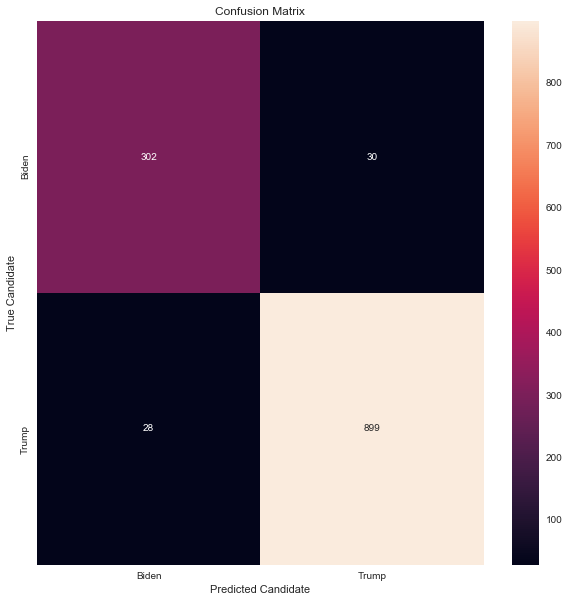

In [83]:
y_pred = eclf.predict(X_test)
print_classification_results(y_pred, y_test, "Voting Classifier")

Able to slighly improve accuracy from ~93% to ~95% by using the top 3 individual classifiers together in a voting ensemble. 

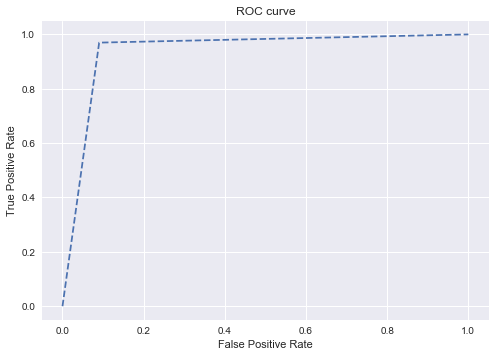

In [84]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show() 